In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from numpy import linalg as la



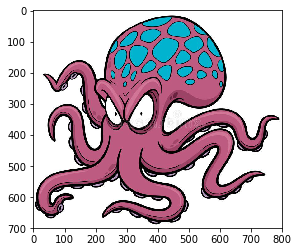

3
700 800 3
uint8
255
0


In [6]:
img = mpimg.imread('octopus.jpg')
plt.imshow(img)
plt.show()
print(img.ndim)
X,Y,Z = img.shape
print(X,Y,Z)
print(img.dtype)
print(img.max())
print(img.min())



In [7]:
red = img[:,:,0]
print('red pixels:')
print(red)

green=img[:,:,1]
print('green pixels')
print(green)

blue=img[:,:,2]
print('blue pixels')
print(blue)



red pixels:
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
green pixels
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
blue pixels
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [8]:
U,s,Vt = la.svd(red)
print(U.shape,s.shape,Vt.shape)

Sigma=np.zeros((X,Y))
for i in range(X):
    Sigma[i,i]=s[i]
    
print(np.allclose(red, U @ Sigma @ Vt))





(700, 700) (700,) (800, 800)
True


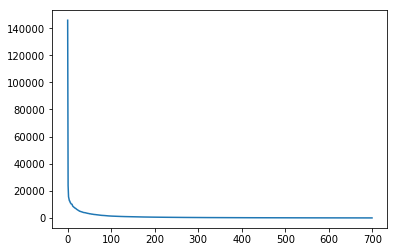

In [9]:
plt.plot(s)
plt.show()

(700, 800)


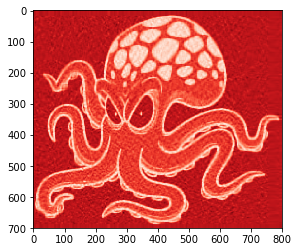

In [10]:
k=50
red_approx = U @Sigma[:,:k] @ Vt[:k, :]
print(red_approx.shape)
plt.imshow(red_approx, cmap="Reds")
plt.show()



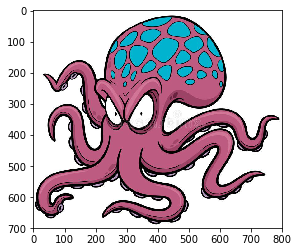

In [11]:
img_recon = np.stack((red,green,blue),axis=2)
plt.imshow(img_recon)
plt.show()



In [12]:
img_transposed = np.transpose(img, (2,0,1))
U,s,Vt = la.svd(img_transposed)
print(U.shape,s.shape,Vt.shape)

Sigma = np.zeros((Z,X,Y))
for j in range(3):
    np.fill_diagonal(Sigma[j,:,:], s[j, :])
    


(3, 700, 700) (3, 700) (3, 800, 800)


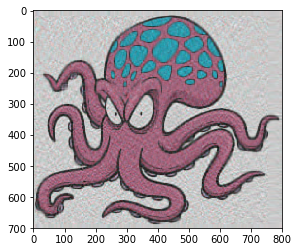

In [13]:
k=50
img_approx = U @ Sigma[..., :k] @ Vt[..., :k, :]
img_approx = np.transpose(img_approx, (1,2,0))
img_approx = img_approx - img_approx.min()
img_approx = img_approx / img_approx.max()
plt.imshow(img_approx)
plt.show()



In [14]:
plt.imsave("octopus_new.jpg", img_approx)